# MSA 2024 Phase 2 - Part 2

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.api.types import is_numeric_dtype
%matplotlib inline

## 1. Load and split preprocessed data

In [2]:
df = pd.read_csv('../datasets/W store sales/result_data.csv')
for index, row in df[df['Weekly_Sales']==0].iterrows():
    df.at[index, 'Weekly_Sales'] = row['Weekly_Sales'] + 0.01

test_ratio = 0.2
train_dates = df["Date"].unique()[:-int(test_ratio*len(df["Date"].unique()))]
test_dates = df["Date"].unique()[-int(test_ratio*len(df["Date"].unique())):]
numeric_columns = [col for col in df.columns[1:] if is_numeric_dtype(df[col]) and col!='Weekly_Sales']
df_train = df[df["Date"].isin(train_dates)]
df_test = df[df["Date"].isin(test_dates)]
x_train = df_train[numeric_columns]
x_test = df_test[numeric_columns]
y_train = df_train["Weekly_Sales"]
y_test = df_test["Weekly_Sales"]

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((338738, 19), (82832, 19), (338738,), (82832,))

In [4]:
# from sklearn.model_selection import train_test_split
# # Create an 80-20 train-test split on the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Choose an algorithm

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# Load an untuned logistic regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

## 3. Train and test a model

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
def getScores(model):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "MAPE": mape, "MSE": mse, "RMSE": rmse, "R2": r2}

In [8]:
model_Linear = LinearRegression()
score = cross_val_score(model_Linear, x_train, y_train, cv=5, scoring="neg_mean_absolute_percentage_error").mean()
print(score)

-630.4269583205648


In [9]:
model_Ridge = Ridge()
parameters = {'alpha': [0.1, 0.5, 1.0, 1.5]}
grid_Ridge = GridSearchCV(model_Ridge, parameters, cv=5)
grid_Ridge.fit(x_train,y_train)
print(grid_Ridge.best_params_)
print(getScores(grid_Ridge))

{'alpha': 0.1}
{'MAE': 14467.12794349301, 'MAPE': 1626.0331674165393, 'MSE': 436333506.7511351, 'RMSE': 20888.59752954073, 'R2': 0.09579611400628862}


In [10]:
model_Lasso = Lasso(alpha=0.2,max_iter=2)
parameters = {'alpha': [0.1, 0.5, 1.0, 1.5], 'max_iter': [2, 10, 100]}
grid_Lasso = GridSearchCV(model_Ridge, parameters, cv=5)
grid_Lasso.fit(x_train,y_train)
print("Best params: ", grid_Lasso.best_params_)
print(getScores(grid_Lasso))

Best params:  {'alpha': 0.1, 'max_iter': 2}
{'MAE': 14467.12794349301, 'MAPE': 1626.0331674165393, 'MSE': 436333506.7511351, 'RMSE': 20888.59752954073, 'R2': 0.09579611400628862}


In [11]:
# model_svr = svm.SVR()
# parameters = {'kernel':['linear'], 'C':[0.1],'gamma':[0.01]}
# grid_svr = GridSearchCV(model_svr, parameters, cv=5)
# grid_svr.fit(x_train,y_train)
# print("Best params: ", grid_svr.best_params_)
# print(getScores(grid_svr))

In [ ]:
model_KNN = KNeighborsRegressor()
parameters = {'n_neighbors':[3,10,100], 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_KNN = GridSearchCV(model_KNN, parameters, cv=5)
grid_KNN.fit(x_train,y_train)
print("Best params: ", grid_KNN.best_params_)
print(getScores(grid_KNN))

In [ ]:
model_forest = RandomForestRegressor(n_estimators=300)

In [ ]:
from sklearn.neural_network import MLPRegressor
model_mlp = MLPRegressor(hidden_layer_sizes=(200,100),activation='relu',alpha=0.001,learning_rate_init=0.001)

1742.5320836138208
13238533.873726811


C:\Users\Francis\AppData\Local\Temp\ipykernel_25496\3858740626.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df_test[df["Store"]==1][df["Dept"]==1].Date, y_test[df["Store"]==1][df["Dept"]==1], marker='o', label="Test Actual")
C:\Users\Francis\AppData\Local\Temp\ipykernel_25496\3858740626.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df_test[df["Store"]==1][df["Dept"]==1].Date, y_test[df["Store"]==1][df["Dept"]==1], marker='o', label="Test Actual")
C:\Users\Francis\AppData\Local\Temp\ipykernel_25496\3858740626.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df_test[df["Store"]==1][df["Dept"]==1].Date, y_pred[df["Store"]==1][df["Dept"]==1], marker='o', label="Test Predict")
C:\Users\Francis\AppData\Local\Temp\ipykernel_25496\3858740626.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df_test[df["Store"]=

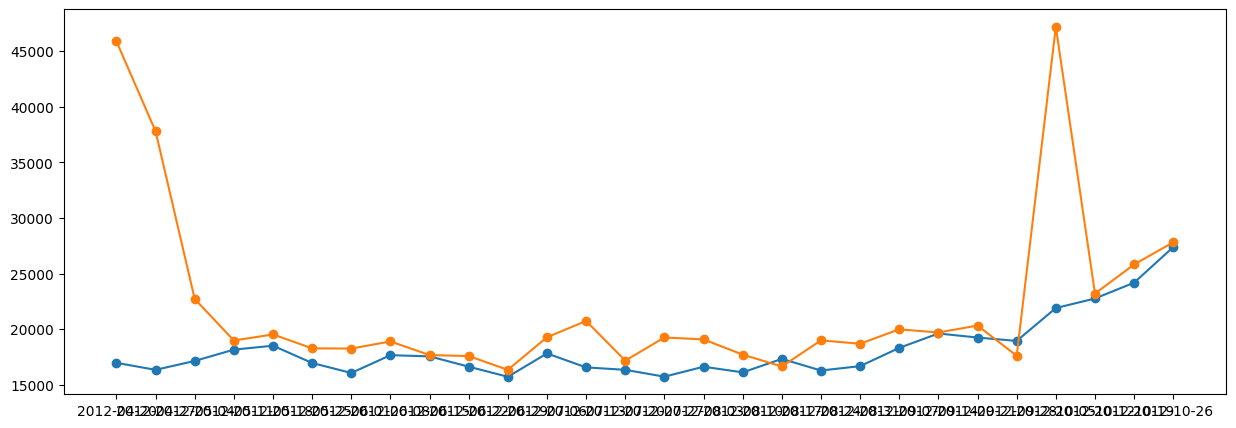

In [ ]:
  # Train a model using a training set

model.fit(x_train, y_train)
# Get predictions using the features of a test set
predictions = model.predict(x_test)
# Test a model using predictions and the targets of a test set
## Classification
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_train, predictions)
## Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, RMSE, SMAPE, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(mae)
print(mse)
y_pred = pd.Series(predictions, index=y_test.index)
plt.figure(figsize=(15,5))
plt.plot(df_test[df["Store"]==1][df["Dept"]==1].Date, y_test[df["Store"]==1][df["Dept"]==1], marker='o', label="Test Actual")
plt.plot(df_test[df["Store"]==1][df["Dept"]==1].Date, y_pred[df["Store"]==1][df["Dept"]==1], marker='o', label="Test Predict")
plt.show()

16976.190000000002
16976.19


## 4. Evaluate the model 

In [ ]:
#

## 5. Summary